# 9. Mixture Models and EM

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_mldata
%matplotlib inline

from prml.clusterings import KMeans
from prml.random import (
    MultivariateGaussianMixture,
    BernoulliMixture
)

## 9.1 K-means Clustering

In [2]:
# training data
x1 = np.random.normal(size=(100, 2))
x1 += np.array([-5, -5])
x2 = np.random.normal(size=(100, 2))
x2 += np.array([5, -5])
x3 = np.random.normal(size=(100, 2))
x3 += np.array([0, 5])
x_train = np.vstack((x1, x2, x3))

x0, x1 = np.meshgrid(np.linspace(-10, 10, 100), np.linspace(-10, 10, 100))
x = np.array([x0, x1]).reshape(2, -1).T

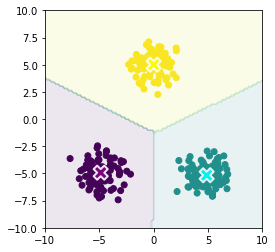

In [3]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x_train)
cluster = kmeans.predict(x_train)
plt.scatter(x_train[:, 0], x_train[:, 1], c=cluster)
plt.scatter(kmeans.centers[:, 0], kmeans.centers[:, 1], s=200, marker='X', lw=2, c=['purple', 'cyan', 'yellow'], edgecolor="white")
plt.contourf(x0, x1, kmeans.predict(x).reshape(100, 100), alpha=0.1)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## 9.2 Mixture of Gaussians

In [4]:
x = np.linspace(0, 1, 500)
y = np.sin(2 * np.pi * x) + np.random.normal(scale=0.2, size=(500,))
x_train = np.vstack((x, y)).T

x0, x1 = np.meshgrid(np.linspace(0, 1, 100), np.linspace(-1, 1, 100))
x = np.array([x0, x1]).reshape(2, -1).T

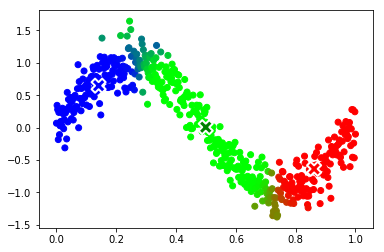

In [5]:
gmm = MultivariateGaussianMixture(n_components=3)
gmm.ml(x_train)
p = gmm.classify_proba(x_train)

plt.scatter(x_train[:, 0], x_train[:, 1], c=p)
plt.scatter(gmm.means[:, 0], gmm.means[:, 1], s=200, marker='X', lw=2, c=['red', 'green', 'blue'], edgecolor="white")
plt.show()

### 9.3.3 Mixtures of Bernoulli distributions

In [6]:
mnist = fetch_mldata("MNIST original")
x = mnist.data
y = mnist.target
x_train = []
for i in [0, 1, 2, 3, 4]:
    x_train.append(x[np.random.choice(np.where(y == i)[0], 200)])
x_train = np.concatenate(x_train, axis=0)
x_train = (x_train > 127).astype(np.float)

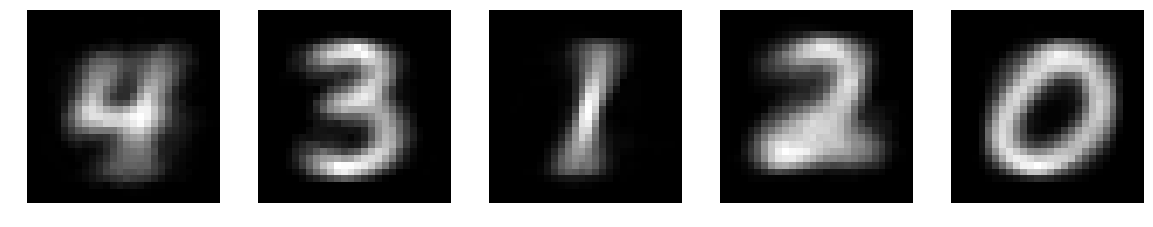

In [7]:
bmm = BernoulliMixture(n_components=5)
bmm.ml(x_train)

plt.figure(figsize=(20, 5))
for i, mean in enumerate(bmm.probs):
    plt.subplot(1, 5, i + 1)
    plt.imshow(mean.reshape(28, 28), cmap="gray")
    plt.axis('off')
plt.show()